# Aula 6 - FUNÇÕES

Até agora viemos construindo ferramentas que nos permitam compreender o fluxo de dados em um código computacional bem como o uso de estruturas condicionais e de repetição. Essas ferramentas, como pudemos perceber, nos permitem uma imensa variedade de formas de resolver diferentes problemas de engenharia.
Quando nos deparamos com problemas de complexidade maior, no entanto, faz-se interessante utilizar **funções** que nos permitam utilizar nossas variáveis do código em programas mais complexos e funcionais.
Nesta aula veremos 2 tipos básicos de funções dentro do Python:
- Funções lambda (ou funções anônimas)
- Funções (externas)

Comecemos pelas funções anônimas.

**FUNÇÕES ANÔNIMAS**

A diferença básica entre uma função anônima e uma função comum é que aquela, apesar de poder receber um número indeterminado de argumentos, deve ser declarada em apenas uma expressão, enquanto a função comum pode ser composta por diversas expressões, como veremos adiante.

A sintaxe básica para o uso de funções anônimas é dada por: _lambda argumentos : expressão_

Por exemplo, utilizemos a função $f(x) = x^2 - x$ e depois calculemos o resultado para diferentes valores de $x$:

In [ ]:
f = lambda x : x**2 - x
print(f(2))

<br> <br> Ou ainda, utilizando com um vetor: <br> <br>

In [ ]:
import numpy as np
f = lambda x : x**2 - x
for x in np.arange(0,10):
    print(f(x))

<br>Assim, podemos perceber que a função anônima do exemplo, definida como $f$, possui $x$ como argumento. Assim, toda vez que invocamos $f(x)$ o programa irá substituir o valor do argumento na função e retornar a resposta final. <br>
A função anônima, como já mencionado, pode possuir um número indeterminado de argumentos. <br>
Suponhamos agora uma equação de Arrhenius, dada por $k = k_0 exp(-\Delta E /{RT})$, onde $k_0$ é o fator pré-exponencial, $\Delta E$ é a variação de energia, $R$ a constante universal dos gases e $T$ a temperatura. Suponhamos ainda que queremos saber como $k$ varia com a temperatura para valores de $k_0$ que desviem em 10% para mais ou para menos do parâmetro original.

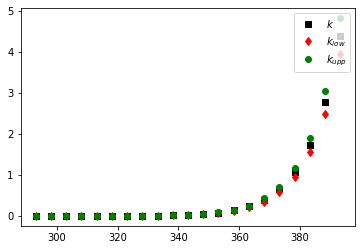

In [29]:
import numpy as np
import matplotlib.pyplot as plt
k0     = 1.32e16 # s^-1
deltaE = 116.5e3 # J/mol
R      = 8.314   # J/mol.K
f = lambda k0, T : k0*np.exp(-deltaE/(R*T))

for T in np.arange(293.15, 393.16, 5):
    k    = f(k0,T)
    klow = f(k0*0.9,T)
    kupp = f(k0*1.1,T)
    plt.plot(T,k,'ks')
    plt.plot(T,klow,'rd')
    plt.plot(T,kupp,'go')

plt.legend(['$k$','$k_{low}$','$k_{upp}$'],loc='upper right')

No exemplo acima, na linha 6, definimos a função $f$ como a função anônima que possui dois argumentos de entrada: $k_0$ e $T$.
Na linha 8 iniciamos uma estrutura de repetição _for_ que irá realizar iterações com a variável $T$ indo de 293.15 K até 393.15 K com incrementos de 5 K. Note que o argumento final para T utilizado foi 393.16, para garantir que o valor de 393.15 K esteja incluso no laço.
Dentro da estrutura de repetição, chamamos a função $f$, que irá calcular a taxa de reação $k$ como uma função de $k_0$ e $T$, para três diferentes valores de $k_0$ (o valor original, o valor 10% menor e o valor 10% maior). Os resultados obtidos foram plotados em um gráfico de $ T vs. k$. <br> 
Para as cores e formas dos pontos do gráfico, utilizamos 'ks' para plotar quadrados (s) pretos (k), 'rd' para plotar losangos (d, de _diamond_) vermelhos (r) e 'go' para plotar círculos (o) verdes (g).  <br> <br>
Ainda que a função anônima seja bastante útil sozinha, ela geralmente é empregada como uma parte integrante de uma outra função (comum), tornando-se uma ferramenta muito forte em códigos de maior grau de complexidade. <br>
<br>
**FUNÇÕES (COMUNS)** <br>
<br>
Uma função é um bloco de códigos que será executada sempre que for chamada. Essa função recebe parâmetros externos que serão utilizados em seu código, realiza as operações programadas e retorna um resultado. <br>
A sintaxe básica de definição de uma função é: _def nome_da_funcao(argumentos):_ <br>
Por exemplo, uma função pode ser criada para encontrar uma das raízes de qualquer polinômio de terceiro grau:

In [6]:
# Definição da função polinomial
def funcao(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d

# Definição da derivada do polinômio
def dfunc(a,b,c,x):
    return 3*a*x**2+2*b*x+c

import numpy as np
# Entrada do usuário
a = float(input("Insira o coeficiente a: "))
b = float(input("Insira o coeficiente b: "))
c = float(input("Insira o coeficiente c: "))
d = float(input("Insira o coeficiente d: "))
x = float(input("Insira o chute inicial x(0): "))

# Loop - Newton-Raphson
Nmax = 100 # Número máximo de iterações
N = 0      # Inicia contador de iterações
while N < Nmax:
    f  = funcao(a,b,c,d,x)
    df = dfunc(a,b,c,x)
    if np.abs(f) < 1e-6:
        break
    x = x - f/df
    N += 1
print(x)

Insira o coeficiente a:  4
Insira o coeficiente b:  3
Insira o coeficiente c:  2
Insira o coeficiente d:  1
Insira o chute inicial x(0):  1


-0.6058296900610083


No exemplo acima, definimos, primeiramente, as duas funções que serão utilizadas: <br>
- A função responsável por calcular $f(x)$ <br>
- A função responsável por calcular $f'(x)$ <br>
<br>

Da mesma maneira que as estruturas condicionais _if_ e as estruturas de repetição _for_ e _while_, o bloco de códigos pertencente à função definida deve estar dentro da identação correta. <br> 
Assim, na linha 2 definimos a função $f$ e quais argumentos ela deve receber (a, b, c, d e x). Na linha 3 (com identação de um TAB "para dentro"), definimos que o resultado da operação $ax^3 + bx^2 + cx + d$ deverá retornar ao código principal. <br>
Na linha 6, iniciamos sem identação, portanto já não estamos mais dentro da função anterior. Na linha 6, definimos a função responsável por fornecer o resultado da derivada do polinômio no ponto $x$ (linha 7). <br>
Da linha 9 em diante, já não estamos mais dentro de nenhuma das duas funções definidas. Assim, nas linhas 11 a 15 pedimos para o usuário inserir os coeficientes do polinômio e um chute inicial para o método de Newton-Raphson. <br>

Na linha 18 definimos o máximo de iterações e na linha 19 iniciamos o contador para o loop _while_ definido na linha 20. <br>
O código contido dentro do laço _while_ é o próprio método de Newton-Raphson, onde invocamos a primeira função criada (_funcao_) com os argumentos inseridos pelo usuário e também a derivada dessa função (linhas 21 e 22). <br>
Assim, ao chegar na linha 21, o código utiliza os argumentos (a,b,c,d,x) dentro da função _funcao_ e retorna com o resultado calculado na linha 3. Igualmente, na linha 22 invocamos a função _dfunc_ com os argumentos (a,b,c,x), assim o código vai até a função _dfunc_, executa os comandos contidos nela e retorna o resultado obtido (linha 7). De posse desses resultados, calculamos o valor de $x$ para a próxima iteração. <br>
O critério de parada e o número de iterações estão contidos nas linhas 23 e 26, respectivamente. <br>
<br>
Alternativamente, podemos criar uma função específica para cada método numérico. Por exemplo, utilizemos o mesmo método de inserção dos coeficientes de um polinômio de terceiro grau e calculemos a raiz através dos métodos da Bisseção e de Newton-Raphson.

In [11]:
import numpy as np
def newtonraphson(a,b,c,d,x):
    Nmax = 100
    N = 0
    while N < Nmax:
        f  = a*x**3 + b*x**2 + c*x + d
        df = 3*a*x**2 + 2*b*x + c
        x = x - f/df
        N+=1
        if np.abs(f)<1e-6:
            break
    
    print(x)

def bissecao(a,b,c,d,xinf,xsup):
    Nmax = 100
    N = 0
    while N < Nmax:
        xc = (xinf+xsup)/2
        finf = a*xinf**3 + b*xinf**2 + c*xinf + d
        f = a*xc**3 + b*xc**2 + c*xc + d
        if finf*f < 0:
            xsup = xc
        else:
            xinf = xc
        if np.abs(f) < 1e-6:
            break
        N += 1
    print(xc)
        

a = float(input("Insira o coeficiente a: "))
b = float(input("Insira o coeficiente b: "))
c = float(input("Insira o coeficiente c: "))
d = float(input("Insira o coeficiente d: "))
metodo = float(input("Para utilizar o método da Bisseção digite 1, para o método de Newton-Raphson digite 2: "))
if metodo == 1:
    xinf = float(input("Insira o limite inferior de busca: "))
    xsup = float(input("Insira o limite superior de busca: "))
    bissecao(a,b,c,d,xinf,xsup)
elif metodo == 2:
    x = float(input("Insira o chute inicial x(0): "))
    newtonraphson(a,b,c,d,x)
else:
    print("Método não reconhecido")


Insira o coeficiente a:  4
Insira o coeficiente b:  3
Insira o coeficiente c:  2
Insira o coeficiente d:  1
Para utilizar o método da Bisseção digite 1, para o método de Newton-Raphson digite 2:  2
Insira o chute inicial x(0):  1


-0.6058295861882846


No exemplo acima, definimos duas funções, sendo uma para cada um dos dois métodos de resolução de equações algébricas não-lineares. <br>
O usuário é, então, requisitado para escolher entre um dos dois métodos. Caso ele escolha bisseção (1), o bloco de código das linhas 37-39 será executado; caso ele escolha Newton-Raphson, o bloco das linhas 41-42 será executado. <br>
Note que os argumentos de cada chamada são diferentes e específicos para cada função. <br>

**EXEMPLO** <br>
<br>
Encontre o volume ocupado por 10 kg de n-butano a 18 atm e 500 K utilizando as equações de Redlich-Kwong e Peng-Robinson. Compare as respostas com a obtida pela lei dos gases ideais. <br>
Dados: <br>
n-Butano <br>
$MW = 58.12 [\frac {g}{mol}]$ <br>
$T_c = 425.2 [K]$ <br>
$P_c = 37.5 [atm]$ <br>
Equação de Redlich-Kwong: <br>
$P =\frac {RT}{(v-b)} - \frac {a}{\sqrt{T} v (v+b)}$ <br>
$a = 0.42748 R^2 \frac {Tc^{2.5}}{Pc}$ <br>
$b = 0.08664 R \frac {Tc}{Pc}$ <br>
<br>
Equação de Peng-Robinson: <br>
$P = \frac {RT}{v-b} - \frac {a \alpha}{v(v+b)+b(v-b)}$ <br>
$a = 0.45724 R^2 \frac {Tc^2}{Pc}$ <br>
$b = 0.07780 R \frac {Tc}{Pc}$ <br>
$\alpha = (1 + k(1-\sqrt{T_R}))^2$ <br>
$k = 0.37464 + 1.54226 w - 0.26992 w^2$ <br>

In [18]:
import numpy as np
# Função para a equação de estado de Redlich-Kwong
def RK(v, R, T, P, Tc, Pc):
    a = 0.42748*(R**2)*(Tc**2.5)/Pc
    b = 0.08664*R*Tc/Pc
    f = v**3 - (R*T/P)*v**2 + (v/P)*(a/np.sqrt(T) - R*T*b - P*b**2)- a*b/(P*np.sqrt(T))
    df = 3*v**2 - 2*v*R*T/P + (1/P)*(a/np.sqrt(T) - R*T*b - P*b**2)
    return f, df

# Função para a equação de estado de Peng-Robinson
def PR(v, R, T, P, Tc, Pc, w):
    Tr = T/Tc
    a = 0.45724*R**2*Tc**2/Pc
    b = 0.07780*R*Tc/Pc
    k = 0.37464 + 1.54226*w - 0.26992*w**2
    alpha = (1 + k*(1-np.sqrt(Tr)))**2
    f = v**3 + v**2*(b-R*T/P) + v*(-3*b**2 - 2*b*R*T/P + a*alpha/P) + (b**3 + b**2*R*T/P - b*a*alpha/P)
    df = 3*v**2 + 2*v*(b-R*T/P) + (-3*b**2 - 2*b*R*T/P + a*alpha/P)
    return f, df

# Código principal
R = 0.082061;       # l.atm/K.mol
m = 10;             # kg
MW = 58.12;         # g/mol
T = 500;            # K
P = 18;             # atm
Tc = 425.2;         # K
Pc = 37.5;          # atm
w = 0.212;
v0 = R*T/P;         # l/mol

# Newton-Raphson para PR
N = 0
Nmax = 100
eps = 1e-6
vPR = v0
while N < Nmax:
    [f,df]=PR(vPR, R, T, P, Tc, Pc, w)
    vPR = vPR - f/df
    #print(vPR)
    if np.abs(f) < eps:
        break
    N += 1
    
# Newton-Raphson para RK
N = 0
Nmax = 100
eps = 1e-6
vRK = v0
while N < Nmax:
    [f,df]=RK(vRK, R, T, P, Tc, Pc)
    vRK = vRK - f/df
    #print(vPR)
    if np.abs(f) < eps:
        break
    N += 1

print('Volumes molares')
print(v0, vPR, vRK)

# Volume total
V0 = m/(MW/1000)*v0
VPR = m/(MW/1000)*vPR
VRK = m/(MW/1000)*vRK
print('Volume total')
print(V0,VPR,VRK)

Volumes molares
2.279472222222222 2.026618168693304 2.037713552315261
Volume total
392.20100175881316 348.69548669877906 350.6045341216898


No exemplo acima, criamos duas funções, sendo cada uma para uma das equações cúbicas de estado dadas no problema, RK e PR. <br>
Assim, ao utilizarmos o método de Newton-Raphson nos laços de repetição das linhas 37-43 e 50-56, simplesmente chamamos as funções RK e PR (linha 38 e linha 51) que já estão programadas para nos fornecer os valores da função e da derivada da função (linha 8 e linha 19). <br>
Note que no loop para Redlich-Kwong, por exemplo, os argumentos de entrada na função (vRK, R, T, P, Tc, Pc) precisam estar na mesma ordem definida na função (linha 3). Além disso, o volume molar que é utilizado como argumento de entrada é o volume molar dos cálculos para RK, portanto vRK. <br>
Os argumentos de saída da função RK (f e df), da mesma maneira que os argumentos de entrada, estão na ordem que foram definidos na função principal (linha 8). Assim, podemos perceber que a ordem de entrada e de saída dos argumentos é o que define o valor que cada variável irá receber. <br>
Assim, a cada iteração um novo valor de vRK é alimentado à função RK e o método de Newton-Raphson prossegue até a convergência. <br>
Neste exemplo, utilizamos duas funções definidas (RK e PR), que são chamadas pela função principal do programa com seus argumentos de entrada (v,R,T,P,Tc,Pc) para retornar seus resultados (f e df). <br>
Por fim, o volume total dos 10 kg de n-Butano é calculado para gases ideais, PR e RK (linhas 62-64). <br>
<br>
**fsolve** <br>
Uma das inúmeras ferramentas numéricas disponíveis para Python é a função _fsolve_, importada da biblioteca _scipy.optimize_. Essa função resolve equações ou sistemas de equações não-lineares. <br>
A sintaxe básica para o uso da função é: _fsolve(função, chute_inicial, args=(argumentos_extras))_ <br>
<br>
Vejamos agora como resolver o problema anterior utilizando a função _fsolve_ (portanto, descartando o uso de Newton-Raphson do exemplo anterior). <br>


In [25]:
import numpy as np
from scipy.optimize import fsolve 
# Função para a equação de estado de Redlich-Kwong
def RK(v, R, T, P, Tc, Pc):
    a = 0.42748*(R**2)*(Tc**2.5)/Pc
    b = 0.08664*R*Tc/Pc
    f = v**3 - (R*T/P)*v**2 + (v/P)*(a/np.sqrt(T) - R*T*b - P*b**2)- a*b/(P*np.sqrt(T))
    return f

# Função para a equação de estado de Peng-Robinson
def PR(v, R, T, P, Tc, Pc, w):
    Tr = T/Tc
    a = 0.45724*R**2*Tc**2/Pc
    b = 0.07780*R*Tc/Pc
    k = 0.37464 + 1.54226*w - 0.26992*w**2
    alpha = (1 + k*(1-np.sqrt(Tr)))**2
    f = v**3 + v**2*(b-R*T/P) + v*(-3*b**2 - 2*b*R*T/P + a*alpha/P) + (b**3 + b**2*R*T/P - b*a*alpha/P)
    return f

# Código principal
R = 0.082061;       # l.atm/K.mol
m = 10;             # kg
MW = 58.12;         # g/mol
T = 500;            # K
P = 18;             # atm
Tc = 425.2;         # K
Pc = 37.5;          # atm
w = 0.212;
v0 = R*T/P;         # l/mol

# fsolve para PR
vPR = fsolve(PR,v0,args=(R, T, P, Tc, Pc, w))

# fsolve para PR
vRK = fsolve(RK,v0,args=(R, T, P, Tc, Pc))

print('Volumes molares')
print(v0, vPR, vRK)

# Volume total
V0 = m/(MW/1000)*v0
VPR = m/(MW/1000)*vPR
VRK = m/(MW/1000)*vRK
print('Volume total')
print(V0,VPR,VRK)

[2.02661817]
[2.03771355]
Volumes molares
2.279472222222222 [2.02661817] [2.03771355]
Volume total
392.20100175881316 [348.6954867] [350.60453412]


No exemplo acima, iniciamos importando, além do numpy, a função _fsolve_ da biblioteca _schipy.optimize_. <br>
As funções criadas para PR e RK foram modificadas, de maneira que não precisamos mais das derivadas das funções. <br>
Por fim, em vez das estruturas de repetição com Newton-Raphson, utilizamos a função importada _fsolve_ para resolver as equações não-lineares. <br>
Voltaremos a tratar mais da função _fsolve_ e outras funções na próxima aula. <br>
<br>
**EXERCÍCIOS** <br>
<br>
1- Crie um programa que possua funções para as quatro operações básicas (soma, subtração, multiplicação e divisão). Essas funções devem receber dois valores (por exemplo, a e b), realizar a operação específica e retornar um resultado. Ao rodar o programa, o usuário deve ter a opção de escolher qual operação quer realizar e depois ele deve inserir os valores que deseja utilizar na operação escolhida. <br>
<br>

In [ ]:
# Insira seu código


2- Crie um programa que calcule os coeficiente de atividade de uma mistura contendo 30% de etanol (1) e 70% de água (2) a uma temperatura de  348.15 K através dos modelos de van Laar e Margules. <br>
Dados: <br>
- van Laar: <br>
$ln \gamma_1 = A_{1,2}(1+\frac {A_{1,2}x_1}{A_{2,1}x_2})^{-2}$ <br>
$ln \gamma_1 = A_{2,1}(1+\frac {A_{2,1}x_2}{A_{1,2}x_1})^{-2}$ <br>
$A_{1,2} = 1.6798$ e $A_{2,1} = 0.9227$ <br>
- Margules: <br>
$ln \gamma_1 = x_2 ^2 (A_{1,2} + 2(A_{2,1}-A_{1,2})x_1)$ <br>
$ln \gamma_2 = x_1 ^2 (A_{2,1} + 2(A_{1,2}-A_{2,1})x_2)$ <br>
$A_{1,2} = 1.6022$ e $A_{2,1} = 0.7947$ <br>
<br>
_R_: $\gamma_{van Laar} = [1.6989, 1.1939]$
    $\gamma_{Margules} = [1.7292, 1.1891]$

In [27]:
# Insira seu código


3- Utilizando os dados do exercícios anterior, elabore um gráfico de Equilíbrio Líquido-Vapor $(x_1,y_1) vs. P$ para a mesma condição de temperatura. <br>
Você vai precisar da lei de Raoult modificada: $y_i P = x_i \gamma_i P_i ^{sat}$ <br>
Lembrando que $\sum{P_i} = P$ <br>
A pressão de saturação pode ser obtida pela equação de Antoine: $P_i ^{sat} = 10^{A_i - \frac {B_i}{T+C_i}}$ <br>
Dados: <br>
$ A = [5.246770 5.076800]$ <br>
$ B = [1598.673 1659.793]$ <br>
$ C = [-46.4240 -45.8540]$ <br>
<br>
As curvas obtidas devem estar muito próximas dos dados experimentais da tabela abaixo:

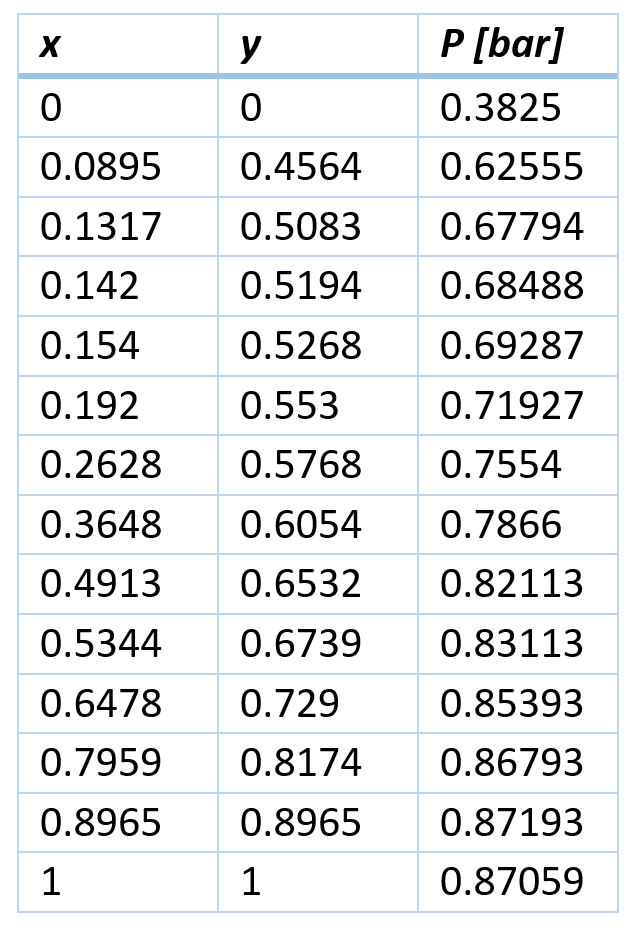

In [28]:
# Insira seu código


O gráfico deverá ficar semelhante a este:
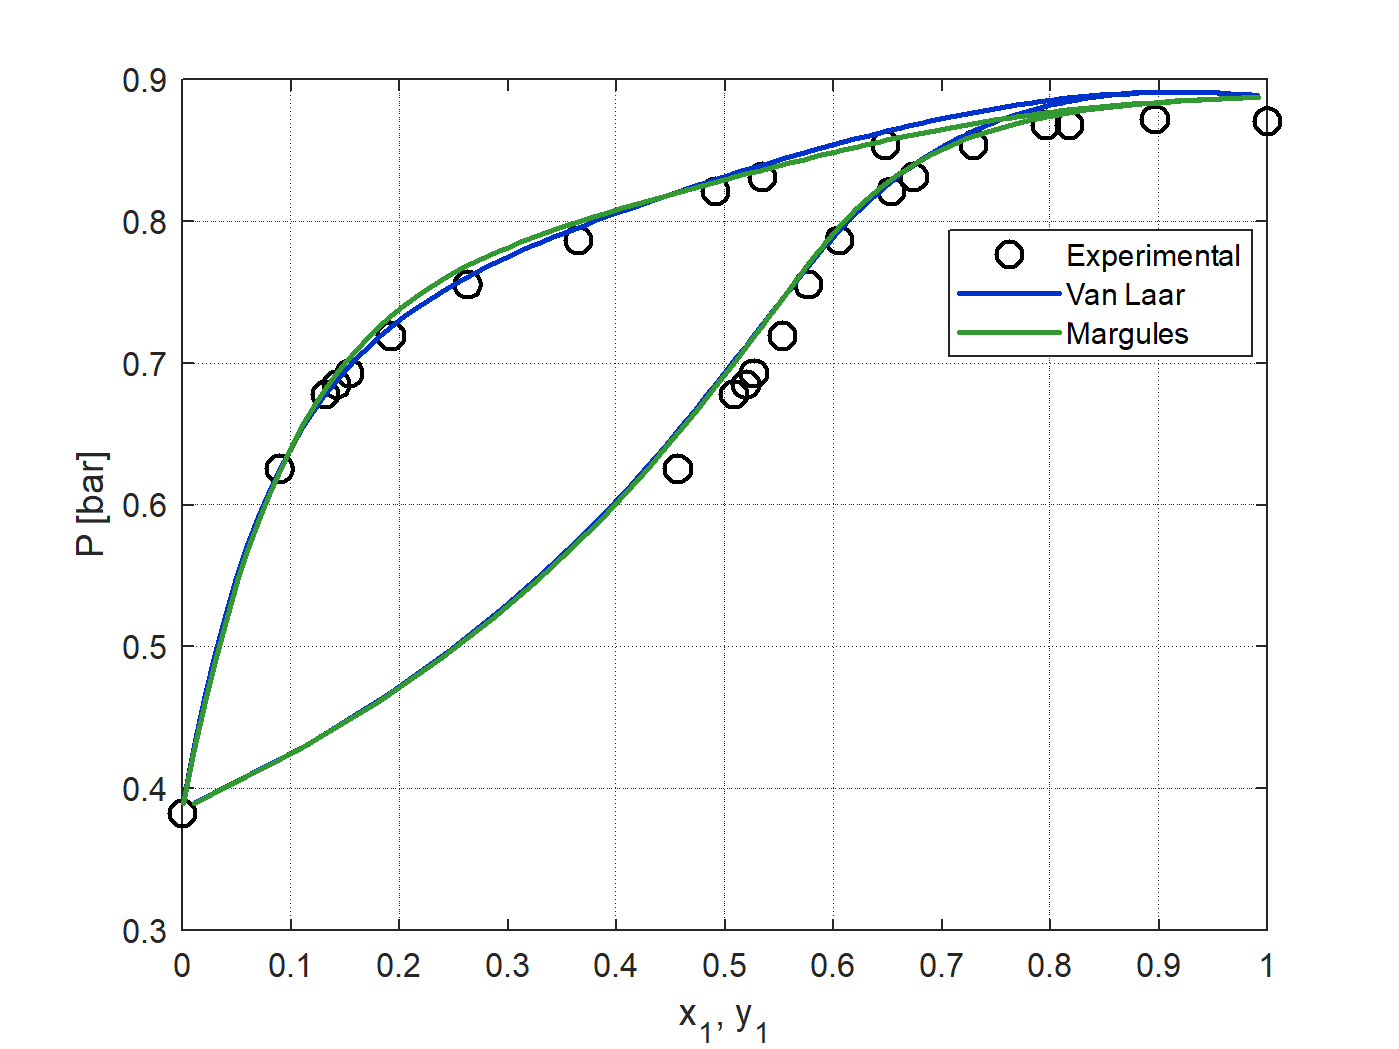